In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

11490434/11490434 [==============================] - 3s 0us/step


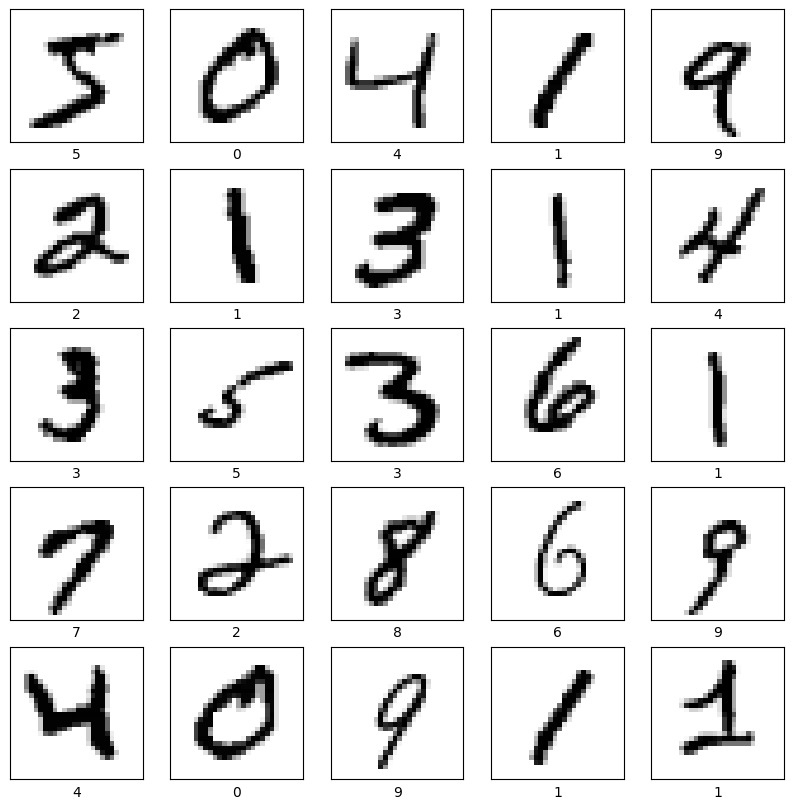

In [3]:
#checking dataset (Not necessary but okay to check)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [4]:
#building the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [5]:
#train
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


1875/1875 [==============================] - 10s 5ms/step - loss: 0.2564 - accuracy: 0.9278
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1139 - accuracy: 0.9664
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0775 - accuracy: 0.9769
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9819
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0455 - accuracy: 0.9857


In [6]:
#testing accuracy
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.0716 - accuracy: 0.9773
Test accuracy: 0.9772999882698059


In [7]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [8]:
#adding more layers

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
#Lets try a different dataset (FASHION)
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


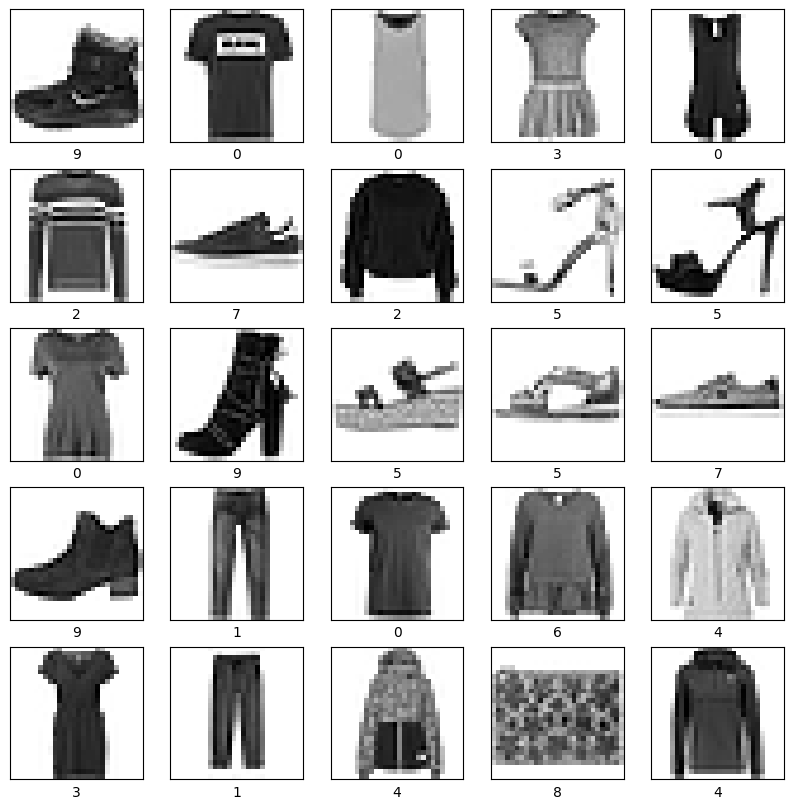

In [11]:
#further training the model with fashion_MNIST
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [23]:
#compile and run
model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 13s 6ms/step - loss: 1.5698 - accuracy: 0.4099 - val_loss: 1.2070 - val_accuracy: 0.5631
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5763 - accuracy: 0.4153 - val_loss: 1.2154 - val_accuracy: 0.5840
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 1.5893 - accuracy: 0.4155 - val_loss: 1.2417 - val_accuracy: 0.5300
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6208 - accuracy: 0.4099 - val_loss: 1.2884 - val_accuracy: 0.5236
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.2500 - accuracy: 0.5215
Test accuracy: 0.5214999914169312


In [24]:
#Using hyperparameter learning rate to observe effect
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 11s 5ms/step - loss: 1.6389 - accuracy: 0.3831 - val_loss: 1.2391 - val_accuracy: 0.5052
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.6924 - accuracy: 0.3699 - val_loss: 1.3206 - val_accuracy: 0.4320
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.6572 - accuracy: 0.3663 - val_loss: 1.2779 - val_accuracy: 0.4855
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.7061 - accuracy: 0.3595 - val_loss: 1.4756 - val_accuracy: 0.4491
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.3157 - accuracy: 0.4676
Test accuracy: 0.4675999879837036


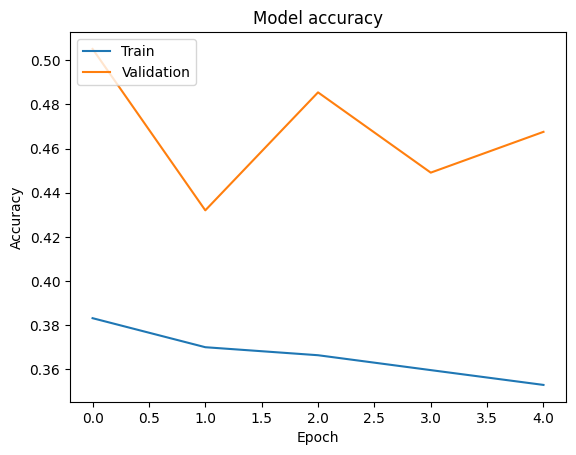

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [26]:
#L1/L2 regularization 
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [27]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

Epoch 1/5
1875/1875 [==============================] - 12s 6ms/step - loss: 4.4929 - accuracy: 0.2403 - val_loss: 1.7780 - val_accuracy: 0.3138
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 2.0038 - accuracy: 0.2485 - val_loss: 1.6696 - val_accuracy: 0.3540
Epoch 3/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.8711 - accuracy: 0.2720 - val_loss: 1.4917 - val_accuracy: 0.3850
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 1.7628 - accuracy: 0.3194 - val_loss: 1.3456 - val_accuracy: 0.4997
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 1.2079 - accuracy: 0.5674
Test accuracy: 0.5673999786376953


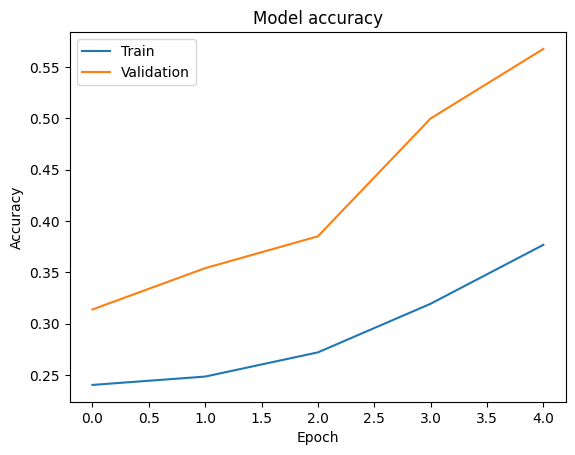

In [29]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [30]:
# Train the model for additional epochs
history = model.fit(train_images, train_labels, epochs=20, validation_data=(test_images, test_labels))

# Evaluate the model after additional training
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy after additional training: {test_acc}')

Epoch 1/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.5266 - accuracy: 0.3850 - val_loss: 1.1994 - val_accuracy: 0.5483
Epoch 2/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.4725 - accuracy: 0.4044 - val_loss: 1.1787 - val_accuracy: 0.5548
Epoch 3/20
1875/1875 [==============================] - 8s 4ms/step - loss: 1.4361 - accuracy: 0.4202 - val_loss: 1.1164 - val_accuracy: 0.5760
Epoch 4/20
1875/1875 [==============================] - 11s 6ms/step - loss: 1.3958 - accuracy: 0.4335 - val_loss: 1.1180 - val_accuracy: 0.5608
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4160 - accuracy: 0.4329 - val_loss: 1.0802 - val_accuracy: 0.5618
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 1.4144 - accuracy: 0.4308 - val_loss: 1.1007 - val_accuracy: 0.5372
Epoch 7/20
1875/1875 [==============================] - 10s 6ms/step - loss: 1.3911 - accuracy: 0.4380 - val_loss: 1.0881 - val_accur